# Projeto Grupo BT-G3


## **Integrantes do grupo**
- Daniel Barzilai
- Larissa Carvalho
- Maria Luisa Maia
- Pedro Rezende
- Rafael Moritz
- Vitor Oliveira

<center><img src="https://www.inteli.edu.br/wp-content/uploads/2021/08/20172028/marca_1-2.png" width="50%" height="50%"/></center>

<h1 align='center'><b>IA para Marketing: Monitoramento de campanhas utilizando processamento de linguagem natural (PLN)<b></h1>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c2/Btg-logo-blue.svg" width="50%" height="50%"/></center>

<h2 align='center'>O Banco BTG Pactual enfrenta um desafio na área de Marketing em entender as necessidades e demandas dos clientes de maneira fácil e rápida nas redes sociais. A solução proposta para esse problema foi o desenvolvimento de uma Inteligência Artificial utilizando processamento de linguagem natural (PLN), capaz de monitorar as campanhas de marketing, voltadas para o Instagram. O objetivo principal dessa solução é rastrear os dados em tempo real, analisar e interpretar as mensagens e comentários enviados pelos clientes na rede social, a fim de identificar as necessidades e demandas de forma precisa e eficiente.</h2>

---

# Sobre os dados

Esse projeto está utilizando dados coletados e tratados pela equipe de Automation do BTG Pactual, o qual disponibilizou o dataset. Com base nas informações dispostas nesse dataset, realizaremos insights a cerca dos comentários feitos nos posts do Instagram do próprio banco. Vale lembrar que os dados estão anonimizados e resguardados para manter a privacidade e ética com os usuários e com o banco.

# 1. Instalação / Setup

Para o início do projeto, fizemos o desenvolvimento no Google Colab, por isso temos uma célula de conexão com o Google Drive, para poder acessar os dados. Caso seja rodado no Jupyter Notebook, precisará do dataset baixado.

In [1]:
#Conectar com o Google Drive

from google.colab import drive
drive.mount('/content/drive')

#Conectando o ambiente ao Google Drive

Mounted at /content/drive


Aqui nós fazemos as importações para tratamento dos dados, pré-processamento dos dados e modelamento do Bag of Words. 

In [2]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 4.8 MB/s eta 0:00:00


In [3]:
!pip install -U emoji
!pip install emoji --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.4.0-py2.py3-none-any.whl size=350809 sha256=43ac1717fb467e45f62074b9f78446c37e85151fa96784e53271f01eb5ead64b
  Stored in directory: /root/.cache/pip/wheels/79/29/1c/234cae4632803c2ba4a76a71a679eb1383cf590775714e2a21
Successfully built emoji
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install enelvo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 20.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234911 sha256=ad8208afc0a199d5dbcc8029adf173baecb4db9aa7214ccac9b914013f833494
  Stored in directory: /root/.cache/pip/wheels/02/3d/88/51a592b9ad17e7899126563698b4e3961983ebe85747228ba6
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.4.0
    Uninstalling emoji-2.4.0:
      Successfully uninstalled emoji-2.4.0


In [5]:
!pip install -U spacy
!python -m spacy download pt_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.2
    Uninstalling spacy-3.5.2:
      Successfully uninstalled spacy-3.5.2
2023-06-06 17:34:44.850519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-06 17:34:46.330037: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 53.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load th

In [6]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import unidecode
from enelvo.normaliser import Normaliser

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer

import nltk

nltk.download('punkt')
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from nltk import word_tokenize, pos_tag

nltk.download('stopwords')
from nltk.corpus import stopwords

nltk.download('rslp')
from nltk.tokenize import RegexpTokenizer

nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import PlaintextCorpusReader
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

import emoji
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


# 2. Entendimento e Tratamento dos Dados

No tratamento de dados, nós analisamos o que podemos mudar no dataframe para fazer uma análise melhor de seus dados e alcançar o objetivo traçado. Dessa forma, é possível visualizar algumas etapas do tratamento abaixo, por exemplo:
- Renomear as colunas para retirar aspas duplos;
- Analisar as colunas com objetos que possam ser quantitativos;
- Remover algumas colunas que não servirão para o desenvolvimento do projeto;
- Filtro para analisar comentários que não tenham o 'btgpactual' como autor, para ter uma análise somente dos usuários.

Rodando o dataset, para analisar seu conteúdo:

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')
data.head(5)

,id,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0


In [9]:
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })

In [10]:
data

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
0,1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12350,3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12352,3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


In [11]:
data.columns

Index(['id', 'dataPublicada', 'autor', 'texto', 'sentimento', 'tipoInteracao',
       'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado',
       'contemHyperlink'],
      dtype='object')

In [12]:
data.dtypes

id                        int64
dataPublicada            object
autor                    object
texto                    object
sentimento               object
tipoInteracao            object
anomalia                  int64
probabilidadeAnomalia     int64
linkPost                 object
processado                int64
contemHyperlink           int64
dtype: object

In [13]:
data = data[data['anomalia'] != 1]
data

,id,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
1,2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
2,3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
3,4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
4,5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
5,6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12346,3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0
12349,3044012,"""2022-11-30 12:00:00""",danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,0,44,https://www.instagram.com/p/Cllt7_nOTBc/,0,0
12351,3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
12353,3044412,"""2022-11-30 12:50:00""",moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação,0,43,https://www.instagram.com/reel/ClluX-cAoaf/,0,0


- Droppando algumas colunas, pois elas não serão necessárias para a nossa análise e desenvolvimento da IA

In [14]:
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
data_dropado

,autor,texto,sentimento,tipoInteracao
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
5,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
12346,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
12349,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


- Retirando todas as mensagens relacionadas ao 'btgpactual', pois não queremos fazer a análise de conteúdo que é feito por eles mesmos (que é o nosso cliente), mas sim dos usuários que dão um feedback.

In [15]:
data_limpo = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
data_limpo

,autor,texto,sentimento,tipoInteracao
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
5,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
12346,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
12349,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


- Confirmação de não nulos dentro do dataset

In [16]:
df = data_limpo.dropna()
df

,autor,texto,sentimento,tipoInteracao
1,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
2,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
3,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
4,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
5,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
12346,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
12349,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
12351,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
12353,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


## 2.1 Visualização dos dados

### Autores que mais comentam

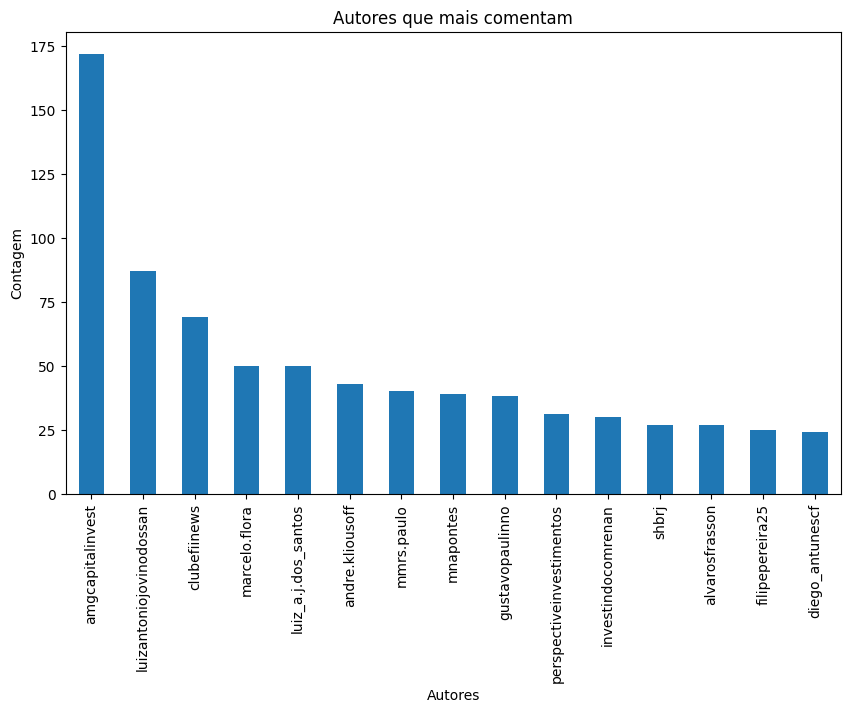

In [17]:
# Contagem de palavras
autor_counts = df['autor'].explode().value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
autor_counts.head(15).plot(kind='bar')
plt.xlabel('Autores')
plt.ylabel('Contagem')
plt.title('Autores que mais comentam')
plt.show()

### Os tipos de interações mais frequentes

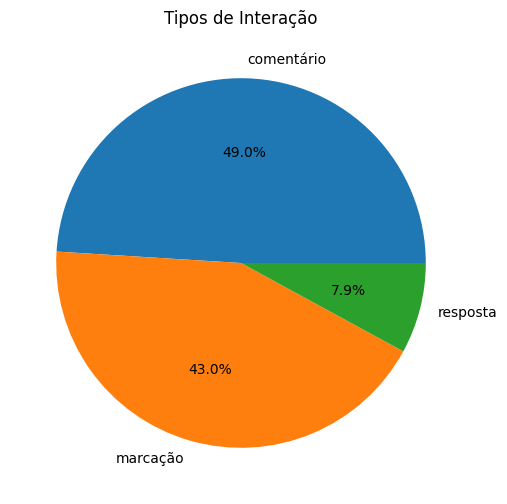

In [18]:
# Contar os tipos de interação
count_interactions = df['tipoInteracao'].value_counts()
# Criar o gráfico de pizza
plt.figure(figsize=(8, 6))
count_interactions.plot(kind='pie', autopct='%1.1f%%')
plt.title('Tipos de Interação')
plt.ylabel('')
plt.show()

### Tipos de sentimentos mais frequentes

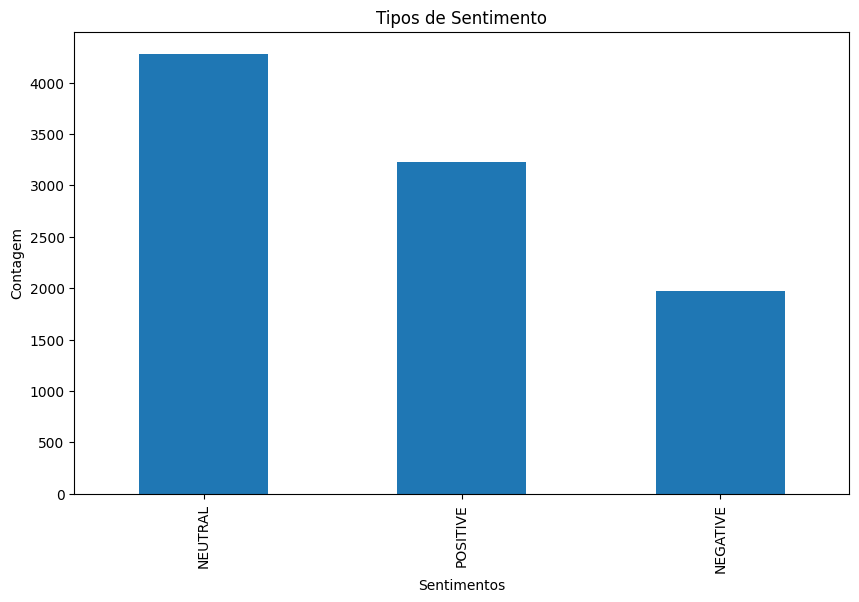

In [19]:
# Contar os tipos de sentimentos
count_sentimentos = df['sentimento'].value_counts()

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
count_sentimentos.plot(kind='bar')
plt.xlabel('Sentimentos')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

### Frequência dos sentimentos por tipo de Interação

<Figure size 1000x600 with 0 Axes>

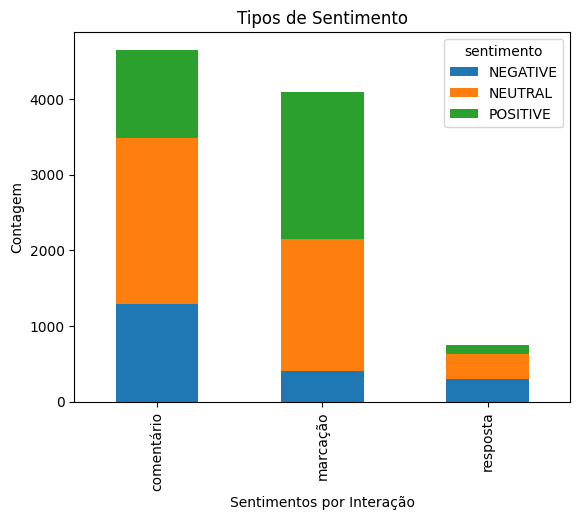

In [20]:
# Contar os tipos de sentimentos por Interação
contagem = df.groupby(['tipoInteracao', 'sentimento']).size().unstack(fill_value=0)

# Plotagem do gráfico de barras
plt.figure(figsize=(10, 6))
contagem.plot(kind='bar', stacked=True)
plt.xlabel('Sentimentos por Interação')
plt.ylabel('Contagem')
plt.title('Tipos de Sentimento')
plt.show()

# 3. Testes isolados



Nesta seção, começamos a fazer testes isolados para demonstrar como é o funcionamento de alguns dos pré-processos que iremos utilizar no dataframe principal. O objetivo é dar um exemplo para visualizar como iremos utilizar antes de ser aplicado em outras funções. Os pré-processos são:
- Tokenização
- Tratamento de emojis
- Remoção de Alfanuméricos
- Tratamento de abreviações
- Remoção de Stopwords
- Lematização

#### 3.1 Tokenização

Aqui estamos pegando a frase e separando ela em suas diversas palavras e componentes.

In [21]:
text = "@btgpacutal https://linkd.in/AQwasd Pessoal, vcs sabiam que esse é o melhor banco da América Latina?!😍 #teste123"

tk = TweetTokenizer()
words = tk.tokenize(text)  

words

['@btgpacutal',
 'https://linkd.in/AQwasd',
 'Pessoal',
 ',',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 '?',
 '!',
 '😍',
 '#teste123']

#### 3.2 Tratamento de emoji

Aqui fazemos o tratamento do emoji que foi visto na frase anterior.

Passamos de um valor "visual" para um valor "textual"

In [22]:
demojized = [emoji.demojize(word) if emoji.emoji_count(word) > 0 else word for word in words]
demojized = [word.replace(":", "").replace("_", "") if any(c in word for c in [":", "_"]) else word for word in demojized]
demojized = [word.replace("-", "_") if "-" in word else word for word in demojized]

demojized

['@btgpacutal',
 'https//linkd.in/AQwasd',
 'Pessoal',
 ',',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 '?',
 '!',
 'smilingfacewithheart_eyes',
 '#teste123']

#### 3.3 Remoção de Alfanuméricos

In [23]:
output_list = []
for word in demojized:
    if word.strip(): 
        palavra_sem_marcacao = re.sub((r'@\w*'), '', word)
        palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
        palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
        output_list.extend(re.findall(r'\w+', palavra_sem_hyperlink)) # analisar se não é melhor usar o append em vez de extend

output_list

['Pessoal',
 'vcs',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'América',
 'Latina',
 'smilingfacewithheart_eyes']

#### 3.4 Tratamento de abreviações

In [24]:
norm = Normaliser(tokenizer='readable')
palavras_normalizadas = []

for palavra in output_list:
  normalizacao = norm.normalise(palavra)
  palavras_normalizadas.append(normalizacao)

# Verificando se alguma palavra normalizada contém '_'
palavras_tratadas = []
for palavra in palavras_normalizadas:
    if '_' in palavra:
        tratado = palavra.replace(' ', '')
        palavras_tratadas.append(tratado)
    else:
        palavras_tratadas.append(palavra)

palavras_tratadas

['pessoal',
 'vocês',
 'sabiam',
 'que',
 'esse',
 'é',
 'o',
 'melhor',
 'banco',
 'da',
 'américa',
 'latina',
 'smilingfacewithheart_eyes']

#### 3.5 Remoção de stopwords

Aqui nós iremos remover palavras que consideramos "desnecessárias" para a análise de sentimentos.

Iremos demonstrar uma lista de quais palavras podem ser essas.

In [25]:
stopwords = nltk.corpus.stopwords.words('portuguese')

stopwords[:10] # exemplo de até 10 palavras, mas podem ser usadas mais que isso

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

In [26]:
filtered_demojized = []

for palavra in palavras_tratadas:
    if palavra not in stopwords:
        filtered_demojized.append(palavra)

filtered_demojized

['pessoal',
 'sabiam',
 'melhor',
 'banco',
 'américa',
 'latina',
 'smilingfacewithheart_eyes']

#### 3.6 Lematização


O modelo pt_core_news_sm do SpaCy para o português, que estamos utilizando, utiliza uma estratégia de lematização baseada em regras e dicionário. No entanto, o modelo pode não conseguir lematizar corretamente algumas palavras, especialmente quando se trata de casos irregulares.

In [27]:
nlp = spacy.load("pt_core_news_sm")

lista = []

for palavra in filtered_demojized:
  doc = nlp(palavra)
  for token in doc:
    if token.lemma_ != '-PRON-':  # Ignorar pronomes pessoais
      if token.pos_ == 'VERB':  # Verificando se é um verbo
          lema = token.lemma_
          break
      else:
          lema = token.lemma_  # Usar o lema do token atual
  lista.append(lema)

lista

['pessoal',
 'sab',
 'bom',
 'Banco',
 'américar',
 'latino',
 'smilingfacewithheart_eyes']

# 4. Definição de funções


Aqui em definição de funções é onde iremos criar as funções referentes aos tratamentos que mostramos acima! Já que, dessa forma, poderemos chamar essas mesmas funções em qualquer momento para fazer o tratamento do conteúdo textual.
- Tokenização
- Tratamento de emojis
- Remoção de Alfanuméricos
- Tratamento de abreviações
- Remoção de Stopwords
- Lematização

#### 4.1 Tokenização

In [28]:
def tokenizer(comentarios):
  comentarios_tokenizados = []
  tk = TweetTokenizer()
  for comentario in comentarios:
    palavras = tk.tokenize(comentario.lower())
    comentarios_tokenizados.append(palavras)
  return comentarios_tokenizados

#### 4.2 Tratamento de emoji

In [29]:
def demojize_tokens(tokens):
  demojized_tokens = []
  for termo in tokens:
    demojized = [emoji.demojize(palavra) if emoji.emoji_count(palavra) > 0 else palavra for palavra in termo]
    demojized = [palavra.replace(":", "").replace("_", "") if any(c in palavra for c in [":", "_"]) else palavra for palavra in demojized]
    demojized = [palavra.replace("-", "_") if "-" in palavra else palavra for palavra in demojized]
    demojized_tokens.append(demojized)
  return demojized_tokens

#### 4.3 Remoção de Alfanuméricos


In [30]:
def removendo_alfanumericos(tokens):
  output_tokens = []
  for sentence in tokens:
      output_list = []
      for palavra in sentence:
          if palavra.strip(): # Verifica se a palavra não é uma string vazia
            palavra_sem_marcacao = re.sub((r'@\w*'), '', palavra)
            palavra_sem_hashtag = re.sub((r'#\w*'), '', palavra_sem_marcacao)
            palavra_sem_hyperlink = re.sub(r'https\S*', '', palavra_sem_hashtag)
            palavra_sem_www = re.sub(r'\bwww\.[^\s]*', '', palavra_sem_hyperlink)
            palavra_sem_numeros = re.sub((r'[0-9]'), '', palavra_sem_www)
            palavra_sem_btg = re.sub((r'\bbtg\b'), '', palavra_sem_numeros)
            palavra_sem_btgpactual = re.sub((r'\bpactual\b'), '', palavra_sem_btg)
            output_list.extend(re.findall(r'\w+', palavra_sem_btgpactual)) # analisar se não é melhor usar o append em vez de extend
      output_tokens.append(output_list)
  return output_tokens

#### 4.4 Tratamento de abreviações 


In [31]:
# Dicionário de gírias e abreviações para normalização
dicionario_girias = {
    'vc': 'você',
    'vcs':'você',
    'Vc': 'você',
    'pq': 'porque',
    'Pq': 'porque',
    'tbm': 'também',
    'q': 'que',
    'td': 'tudo',
    'blz': 'beleza',
    'flw': 'falou',
    'kd': 'cadê',
    'Gnt ': 'gente',
    'gnt ': 'gente',
    'to': 'estou',
    'mt': 'muito',
    'cmg': 'comigo',
    'ctz': 'certeza',
    'jah': 'já',
    'naum': 'não',
    'ta': 'está',
    'eh': 'é',
    'vdd': 'verdade',
    'vlw': 'valeu',
    'p': 'para',
    'sdds': 'saudades',
    'qnd': 'quando',
    'msm': 'mesmo',
    'fzr': 'fazer',
    's' : 'sim',
    'ss': 'sim',
    'Ss': 'sim',
    'pdc': 'pode crer',
    'n' : 'não',
    'nn': 'não',
    'Nn': 'não',
    'pls': 'please',
    'obg': 'obrigado',
    'agr': 'agora'
}

In [32]:
def comentarios_normalizados(tokens, dicionario_girias):
  tokens_normalizados = []

  for sentence in tokens:
    treated = []

    for palavra in sentence:
      if palavra in dicionario_girias:
          palavra_normalizada = dicionario_girias.get(palavra, palavra)
          treated.append(palavra_normalizada)
      else:
          treated.append(palavra)

    treated = [palavra.replace(' ', '') if '_' in palavra else palavra for palavra in treated]
    tokens_normalizados.append(treated)

  return tokens_normalizados

#### 4.5 Remoção de stopwords

##### Lista stopwords

In [33]:
stopwords = nltk.corpus.stopwords.words('portuguese')
len(stopwords)

207

In [34]:
new_stopwords = [ 'a', 'à', 'adeus', 'agora', 'aí', 'ainda', 'além', 'algo', 'alguém', 'algum', 'alguma', 'algumas', 'alguns', 'ali', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'anos', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aqui', 'aquilo', 'área', 'as', 'às', 'assim', 'até', 'atrás', 'através', 'baixo', 'bastante', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cá', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cima', 'cinco', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contra', 'contudo', 'custa', 'da', 'dá', 'dão', 'daquela', 'daquelas', 'daquele', 'daqueles', 'dar', 'das', 'de', 'debaixo', 'dela', 'delas', 'dele', 'deles', 'demais', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'deve', 'devem', 'devendo', 'dever', 'deverá', 'deverão', 'deveria', 'deveriam', 'devia', 'deviam', 'dez', 'dezanove', 'dezasseis', 'dezassete', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dois', 'dos', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'embora', 'enquanto', 'entre', 'era', 'eram', 'éramos', 'és', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estás', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou', 'etc', 'eu', 'exemplo', 'faço', 'falta', 'favor', 'faz', 'fazeis', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazes', 'feita', 'feitas', 'feito', 'feitos', 'fez', 'fim', 'final', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foste', 'fostes', 'fui', 'geral', 'grande', 'grandes', 'grupo', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'isso', 'isto', 'já', 'la', 'lá', 'lado', 'lhe', 'lhes', 'lo', 'local', 'logo', 'longe', 'lugar', 'maior', 'maioria', 'mais', 'mal', 'mas', 'máximo', 'me', 'meio', 'menor', 'menos', 'mês', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'mil', 'minha', 'minhas', 'momento', 'muita', 'muitas', 'muito', 'muitos', 'na', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'nem', 'nenhum', 'nenhuma', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nível', 'no', 'noite', 'nome', 'nos', 'nós', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'número', 'nunca', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'paucas', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'pude', 'pôde', 'podem', 'podendo', 'poder', 'poderia', 'poderiam', 'podia', 'podiam', 'põe', 'põem', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'posição', 'possível', 'possivelmente', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'puderam', 'quais', 'quáis', 'qual', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'queres', 'quero', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'são', 'se', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sejamos', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'serei', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'sétima', 'sétimo', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'sois', 'somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tanto', 'tão', 'tarde', 'te', 'tem', 'tém', 'têm', 'temos', 'tendes', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teu', 'teus', 'teve', 'ti', 'tido', 'tinha', 'tinham', 'tínhamos', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes', 'toda', 'todas', 'todavia', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'última', 'últimas', 'último', 'últimos', 'um', 'uma', 'umas', 'uns', 'vai', 'vais', 'vão', 'vários', 'vem', 'vêm', 'vendo', 'vens', 'ver', 'vez', 'vezes', 'viagem', 'vindo', 'vinte', 'vir', 'você', 'vocês', 'vos', 'vós', 'vossa', 'vossas', 'vosso', 'vossos', 'zero', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '_' ]
len(new_stopwords)

560

In [35]:
sem_acentuacao_stopwords = ['de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','por','mais','as','dos','como','mas','foi','ao','ele','das','tem','a','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo','pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao','voce','tinha','foram','essa','num','nem','suas','meu','as','minha','tem','numa','pelos','elas','havia','seja','qual','sera','nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','voces','vos','lhes','meus','minhas','teu','tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas','isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera','estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos','hao','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos','houverem','houverei','houvera','houveremos','houverao','houveria','houveriamos','houveriam','sou','somos','sao','era','eramos','eram','fui','foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos','serao','seria','seriamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos','tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam']
len(sem_acentuacao_stopwords)

219

In [36]:
def merge_stopwords(arr1, arr2):
    merged = arr1.copy()  # Cria uma cópia do primeiro array
    for element in arr2:
        if element not in merged:
            merged.append(element)  # Adiciona apenas os elementos que não estão presentes no primeiro array
    return merged

In [37]:
stopwords = merge_stopwords(stopwords, new_stopwords)

In [38]:
stopwords = merge_stopwords(stopwords, sem_acentuacao_stopwords)

In [39]:
stopwords.remove('não')

In [40]:
len(stopwords)

588

##### Função

In [41]:
def remove_stopwords(tokens):
  filtered_tokens = []
  for sentence in tokens:
      filtered = [palavra for palavra in sentence if palavra not in stopwords]
      filtered_tokens.append(filtered)
  return filtered_tokens

#### 4.6 Lematização


In [42]:
def lematizacao(tokens):
  # Carregar o modelo pré-treinado do SpaCy para o idioma português
  nlp = spacy.load("pt_core_news_sm")
  lemmatized_tokens = []

  for sentence in tokens:
    lemma_list = []
    doc = nlp(" ".join(sentence))  # Unir as palavras da frase em uma única string

    for token in doc:
      if token.lemma_ != '-PRON-':
        if token.pos_ == 'VERB':
          palavra_lematizada = token.lemma_
        else:
          palavra_lematizada = token.lemma_

        if palavra_lematizada:
          lemma_list.append(palavra_lematizada)

    lemmatized_tokens.append(lemma_list)
    
  # Converter todas as palavras para minúsculas
  lemmatized_tokens_lower = []
  for sentence in lemmatized_tokens:
    sentence_lower = [palavra.lower() for palavra in sentence]
    lemmatized_tokens_lower.append(sentence_lower)
  
  return lemmatized_tokens_lower

#### 4.7 Processamento de texto

In [43]:
# def processarTexto(texto):
#   tokens_processados = texto.map(lematizacao) 
#   return tokens_processados

# 5. Testes das funções

### Selecionando algumas frases para fazer testes

In [44]:
df = df.reset_index(drop=True)
df

,autor,texto,sentimento,tipoInteracao
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
9482,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9483,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9484,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação
9485,moinho_cultural,"""👉GUADAKAN está chegando!!!! A aula pública e...",NEUTRAL,marcação


#### Mini-tratamento

In [45]:
df = df[df['autor'] != 'moinho_cultural']
df

,autor,texto,sentimento,tipoInteracao
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
9481,perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário
9482,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9483,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9484,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação


#### Printando algumas frases

In [46]:
print(df['texto'].iloc[0])

A Alvarez & Marsal estará conosco no Sportainmet® Labs, primeiro evento do sportainment® da América Latina em uma parceria entre BTG Pactual, Hubstage, Bichara e Motta Advogados e Win the Game.   Participe! Evento online e gratuito • 23 de março Inscreva-se no link na bio 💙 😉  . . #Hubstage #SportainmentLabs #BicharaeMotta #BTGPactual #WinTheGame #Sportainment #Esporte #Entretenimento #Digital #futuro


In [47]:
print(df['texto'].iloc[92])

Russia X Ucrania  Quais os impactos Economicos? 🧐 Te explico em 2 minutos 🤓 🚀 🎯 📊👩🏽‍💻  #assessoradeinvestimentos #vidadeassessor #aai #mulheresnomercado #educacaofinanceira #investimentos  #economia #financas #cenarioeconomico #cenariomacro #mercadoemfoco #mercadofinanceiro


### 5.1 Tokenização
- Para o processo de tokenização, é possível visualizar que em qualquer caso, a função consegue tokenizar todo e qualquer termo existente da frase.

In [48]:
tokenized_data = tokenizer(df['texto'])
print(tokenized_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', '?', '🧐', 'te', 'explico', 'em', '2', 'minutos', '🤓', '🚀', '🎯', '📊', '👩🏽\u200d💻', '#assessoradeinvestimentos', '#vidadeassessor', '#aai', '#mulheresnomercado', '#educacaofinanceira', '#investimentos', '#economia', '#financas', '#cenarioeconomico', '#cenariomacro', '#mercadoemfoco', '#mercadofinanceiro']


### 5.2 Tratamento de emoji

In [49]:
demojized_data = demojize_tokens(tokenized_data)
print(demojized_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', '?', 'facewithmonocle', 'te', 'explico', 'em', '2', 'minutos', 'nerdface', 'rocket', 'bullseye', 'barchart', 'womantechnologistmediumskintone', '#assessoradeinvestimentos', '#vidadeassessor', '#aai', '#mulheresnomercado', '#educacaofinanceira', '#investimentos', '#economia', '#financas', '#cenarioeconomico', '#cenariomacro', '#mercadoemfoco', '#mercadofinanceiro']


### 5.3 Remoção de alfanuméricos


In [50]:
alfanumericos_data = removendo_alfanumericos(demojized_data)
print(alfanumericos_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', 'facewithmonocle', 'te', 'explico', 'em', 'minutos', 'nerdface', 'rocket', 'bullseye', 'barchart', 'womantechnologistmediumskintone']


### 5.4 Tratamento de abreviações 


In [51]:
normalizacao_data = comentarios_normalizados(alfanumericos_data, dicionario_girias)
print(normalizacao_data[92])

['russia', 'x', 'ucrania', 'quais', 'os', 'impactos', 'economicos', 'facewithmonocle', 'te', 'explico', 'em', 'minutos', 'nerdface', 'rocket', 'bullseye', 'barchart', 'womantechnologistmediumskintone']


### 5.5 Remoção de stopwords

In [52]:
stopwords_data = remove_stopwords(normalizacao_data)
print(stopwords_data[92])

['russia', 'x', 'ucrania', 'impactos', 'economicos', 'facewithmonocle', 'explico', 'minutos', 'nerdface', 'rocket', 'bullseye', 'barchart', 'womantechnologistmediumskintone']


### 5.6 Lematização


In [53]:
lematizacao_data = lematizacao(stopwords_data)
print(lematizacao_data[92])

['russia', 'x', 'ucrania', 'impacto', 'economico', 'facewithmonocle', 'explico', 'minuto', 'nerdface', 'rocket', 'bullseye', 'barchart', 'womantechnologistmediumskintone']


# 6. Processamento / Demonstrações

Nessa seção de processamento, nós aplicamos as funções criadas anteriormente e aplicamos elas no dataframe, como forma de demonstrar os resultados efetivos.
- tokenized = coluna tokenizada
- no_stopwords = coluna tokenizada e sem stopwords
- texto_processed = coluna tokenizada, sem stopwords e sem acentuações
- stemmed = coluna tokenizada, sem stopwords, sem acentuações e com o stemming aplicado

In [54]:
df

,autor,texto,sentimento,tipoInteracao
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
9481,perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário
9482,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9483,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9484,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação


In [55]:
df['tokenized'] = tokenizer(df['texto'])
df.head(10)

<ipython-input-55-10d996576f5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokenized'] = tokenizer(df['texto'])


,autor,texto,sentimento,tipoInteracao,tokenized
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]"
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró..."
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc]


In [56]:
df['emojis_tratados'] = demojize_tokens(df['tokenized'])
df.head(10)

<ipython-input-56-6091c31e63a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emojis_tratados'] = demojize_tokens(df['tokenized'])


,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]","[@ricktolledo, sim]"
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró..."
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc],[@thaotinhasbfc]


In [57]:
df['sem_alfanumerico'] = removendo_alfanumericos(df['emojis_tratados'])
df.head(10)

<ipython-input-57-6e78b9f55129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sem_alfanumerico'] = removendo_alfanumericos(df['emojis_tratados'])


,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados,sem_alfanumerico
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim]
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,..."
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc],[@thaotinhasbfc],[]


In [58]:
df['sem_abreviacoes'] = comentarios_normalizados(df['sem_alfanumerico'],dicionario_girias) # tem que ver como passar como argumento o dicionário de abreviação e a lista de excluir palavras
df.head(10)

<ipython-input-58-a5fd8b47daf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sem_abreviacoes'] = comentarios_normalizados(df['sem_alfanumerico'],dicionario_girias) # tem que ver como passar como argumento o dicionário de abreviação e a lista de excluir palavras


,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados,sem_alfanumerico,sem_abreviacoes
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim]
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,..."
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[há, anos, eu, vivo, horas, por, dia, o, merca..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc],[@thaotinhasbfc],[],[]


In [59]:
df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])
df.head(10)

<ipython-input-59-b0910964a90f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_stopwords'] = remove_stopwords(df['sem_abreviacoes'])


,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados,sem_alfanumerico,sem_abreviacoes,no_stopwords
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[]
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, administra]"
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[início, guerra, rússia, ucrânia, velho, apare..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[fundo, imobiliário, hospital, senhora, lourde..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[parceiros, wiseaai, btgpactual, evento, move,..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[vivo, mercado, financeiro, empreendo, setor, ..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc],[@thaotinhasbfc],[],[],[]


In [60]:
df['lematizado'] = lematizacao(df['no_stopwords'])
df.head(10)

<ipython-input-60-ec72ad5d8a06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lematizado'] = lematizacao(df['no_stopwords'])


,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados,sem_alfanumerico,sem_abreviacoes,no_stopwords,lematizado
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact...","[btgpactual, with, makerepost, entender, impac..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,"[@ricktolledo, sim]","[@ricktolledo, sim]",[sim],[sim],[],[]
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, administra]","[querer, saber, banking, administrar]"
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[início, guerra, rússia, ucrânia, velho, apare...","[início, guerra, rússia, ucrânia, velho, apare..."
6,clubefiinews,O Fundo Imobiliário Hospital Nossa Senhora de ...,NEGATIVE,marcação,"[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[o, fundo, imobiliário, hospital, nossa, senho...","[fundo, imobiliário, hospital, senhora, lourde...","[fundo, imobiliário, hospital, senhor, lourde,..."
7,marciotome_,Sem alguns parceiros como a wiseaai e btgpactu...,NEUTRAL,marcação,"[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[sem, alguns, parceiros, como, a, wiseaai, e, ...","[parceiros, wiseaai, btgpactual, evento, move,...","[parceiro, wiseaai, btgpactual, evento, mover,..."
8,gustavonascimentoofc,Há 10 anos eu vivo 24 horas por dia o mercado ...,POSITIVE,marcação,"[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, 10, anos, eu, vivo, 24, horas, por, dia, ...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[há, anos, eu, vivo, horas, por, dia, o, merca...","[vivo, mercado, financeiro, empreendo, setor, ...","[viver, mercado, financeiro, empreer, setor, o..."
9,claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,[@thaotinhasbfc],[@thaotinhasbfc],[],[],[],[]


In [61]:
df = df.drop(df[df['lematizado'].apply(lambda x: len(x) == 0)].index)
df

,autor,texto,sentimento,tipoInteracao,tokenized,emojis_tratados,sem_alfanumerico,sem_abreviacoes,no_stopwords,lematizado
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, &, marsal, estará, conosco, no, s...","[a, alvarez, marsal, estará, conosco, no, spor...","[a, alvarez, marsal, estará, conosco, no, spor...","[alvarez, marsal, estará, conosco, sportainmet...","[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[#repost, btgpactual, with, make_repost, ・, ・,...","[#repost, btgpactual, with, makerepost, ・, ・, ...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, os, im...","[btgpactual, with, makerepost, entenda, impact...","[btgpactual, with, makerepost, entender, impac..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, de, ouro]","[minuto, touro, ouro]","[minuto, touro, ouro]"
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, btg, banking, é, a, pró...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, se, a, banking, é, a, própria,...","[queria, saber, banking, administra]","[querer, saber, banking, administrar]"
5,donadabolsaoficial,"Com o início da guerra entre Rússia e Ucrânia,...",NEGATIVE,marcação,"[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[com, o, início, da, guerra, entre, rússia, e,...","[início, guerra, rússia, ucrânia, velho, apare...","[início, guerra, rússia, ucrânia, velho, apare..."
...,...,...,...,...,...,...,...,...,...,...
9481,perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,"[excelente, explicação]","[excelente, explicação]","[excelente, explicação]","[excelente, explicação]","[excelente, explicação]","[excelente, explicação]"
9482,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,"[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, o, telefone, pelo, amor, de, deus]","[atendam, telefone, amor, deus]","[atendar, telefone, amor, deus]"
9483,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,"[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, 10, maiores, fiis...","[você, sabe, quais, são, os, maiores, fiis, do...","[você, sabe, quais, são, os, maiores, fiis, do...","[maiores, fiis, mercado, não, selecionei, prin...","[grande, fiis, mercado, não, selecionar, princ..."
9484,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,"[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, para, eliminar, antes, do...","[erros, financeiros, eliminar, parar, ostentar...","[erro, financeiro, eliminar, parar, ostentar, ..."


# 7. Pipeline de pré-processamento com novo DataFrame tratado

Essa seção é extremamente importante, pois nela criamos a função de pipeline com todas as outras funções que criamos anteriormente. Então, ela é feita para que seja possível de rodar somente ela e ter um resultado efetivo!

In [62]:
data = pd.read_csv('/content/drive/MyDrive/Módulo 6/projeto/base_nova_csv.csv')
data = data.rename(columns={'"anomalia"' : 'anomalia', '"dataPublicada"' : 'dataPublicada', '"autor"' : 'autor', '"texto"' : 'texto', '"sentimento"' : 'sentimento', '"tipoInteracao"' : 'tipoInteracao', '"probabilidadeAnomalia"' : 'probabilidadeAnomalia', '"linkPost"' : 'linkPost', '"processado"' : 'processado',  '"contemHyperlink"' : 'contemHyperlink' })
data = data[data['anomalia'] != 1]
data_dropado = data.drop(['id', 'dataPublicada', 'anomalia', 'probabilidadeAnomalia', 'linkPost', 'processado', 'contemHyperlink'], axis=1)
df = data_dropado.loc[data_dropado['autor'] != 'btgpactual']
df = df[df['autor'] != 'moinho_cultural']
df_principal = df.reset_index(drop=True)
df_principal

,autor,texto,sentimento,tipoInteracao
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário
...,...,...,...,...
9472,perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário
9473,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário
9474,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação
9475,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação


## 7.1 Definição de Função

O código abaixo é uma função  "pipeline" que realiza uma série de etapas de pré-processamento, como a tokenização, tratamento de emojis, remoção de alfanuméricos, normalização das abreviações, remoção das stopwords e lematização. 

In [63]:
def pipeline(comment):
      # Tokenização
      tokens = tokenizer(comment)
      # Tratamento de Emojis
      #demojized = demojize_tokens(tokens)
      # Remoção dos alfanuméricos
      no_alfanumericos = removendo_alfanumericos(tokens)
      # Normalização das abreviações
      normalizado = comentarios_normalizados(no_alfanumericos, dicionario_girias)
      # Remoção das stopwords
      no_stopwords = remove_stopwords(normalizado)
      # lematização
      tratados = lematizacao(no_stopwords)
      
      return tratados

## 7.2 Testes da Função

Abaixo a função definida acima é testada com a coluna "texto" do dataframe (df).

In [64]:
output = pipeline(df['texto'])
output

[['alvarez',
  'marsal',
  'estar',
  'conosco',
  'sportainmet',
  'labsr',
  'evento',
  'sportainment',
  'américar',
  'latino',
  'parceria',
  'hubstage',
  'bichar',
  'motta',
  'advogado',
  'win',
  'the',
  'game',
  'participe',
  'evento',
  'online',
  'gratuito',
  'março',
  'inscreva',
  'link',
  'bio'],
 ['btgpactual',
  'with',
  'make_repost',
  'entendar',
  'impacto',
  'conflito',
  'rússia',
  'x',
  'ucrânio',
  'cenário',
  'global',
  'live',
  'inédito',
  'amanhã',
  'h',
  'anatole',
  'kaletsky',
  'sócio',
  'fundador',
  'economista',
  'chefe',
  'gavekal',
  'research',
  'joão',
  'scandiuzzi',
  'estrategista',
  'global',
  'wealth',
  'management',
  'moderação',
  'daniel',
  'cunha',
  'estar',
  'vivo',
  'canal',
  'youtube',
  'não',
  'percar',
  'informação',
  'importante',
  'áudio',
  'original',
  'inglês'],
 ['minuto', 'touro', 'ouro'],
 [],
 ['querer', 'saber', 'banking', 'administrar'],
 ['início',
  'guerra',
  'rússia',
  'ucrânia

## 7.3 Criação do DataFrame tratado

Depois de testada a função, uma nova coluna, somente com a função pipeline, é criada, que tem como objetivo repassar todo o pré-processamento.

In [65]:
df_output = pd.DataFrame({'texto': output})
df_output

,texto
0,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,"[btgpactual, with, make_repost, entendar, impa..."
2,"[minuto, touro, ouro]"
3,[]
4,"[querer, saber, banking, administrar]"
...,...
9472,"[excelente, explicação]"
9473,"[atendar, telefone, amor, deus]"
9474,"[grande, fiis, mercado, não, selecionar, princ..."
9475,"[erro, financeiro, eliminar, parar, ostentar, ..."


In [66]:
df_merged = df_principal.merge(df_output[['texto']], left_index=True, right_index=True)
df_merged

,autor,texto_x,sentimento,tipoInteracao,texto_y
0,winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,Minuto touro de ouro,POSITIVE,comentário,"[minuto, touro, ouro]"
3,vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,[]
4,ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,"[querer, saber, banking, administrar]"
...,...,...,...,...,...
9472,perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,"[excelente, explicação]"
9473,eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,"[atendar, telefone, amor, deus]"
9474,danielucm,Você sabe quais são os 10 maiores FIIs do merc...,POSITIVE,marcação,"[grande, fiis, mercado, não, selecionar, princ..."
9475,amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,"[erro, financeiro, eliminar, parar, ostentar, ..."


In [67]:
df = df_merged.drop(['texto_x', 'tipoInteracao'], axis=1)
df = df.rename(columns={'texto_y': 'texto_tratado'})
df

,autor,sentimento,texto_tratado
0,winthegame_of,NEUTRAL,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,NEUTRAL,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,POSITIVE,"[minuto, touro, ouro]"
3,vanilson_dos,NEUTRAL,[]
4,ricktolledo,POSITIVE,"[querer, saber, banking, administrar]"
...,...,...,...
9472,perspectiveinvestimentos,POSITIVE,"[excelente, explicação]"
9473,eduardocolares,POSITIVE,"[atendar, telefone, amor, deus]"
9474,danielucm,POSITIVE,"[grande, fiis, mercado, não, selecionar, princ..."
9475,amgcapitalinvest,NEUTRAL,"[erro, financeiro, eliminar, parar, ostentar, ..."


Para processos futuros, foi necessário transformar as palavras da coluna "sentimento" (positive; neutral; negative) para valores numéricos (2; 1; 0), esse processo é chamado de Label Encoding.


In [68]:
# Realizando o replace dos valores
replace_dict = {'POSITIVE': 2, 'NEUTRAL': 1, 'NEGATIVE': 0}
df['sentimento'] = df['sentimento'].replace(replace_dict)
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,2,"[minuto, touro, ouro]"
3,vanilson_dos,1,[]
4,ricktolledo,2,"[querer, saber, banking, administrar]"
...,...,...,...
9472,perspectiveinvestimentos,2,"[excelente, explicação]"
9473,eduardocolares,2,"[atendar, telefone, amor, deus]"
9474,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ..."
9475,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ..."


In [69]:
df = df.drop(df[df['texto_tratado'].apply(lambda x: len(x) == 0)].index)
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"[alvarez, marsal, estar, conosco, sportainmet,..."
1,marta_bego,1,"[btgpactual, with, make_repost, entendar, impa..."
2,lmviapiana,2,"[minuto, touro, ouro]"
4,ricktolledo,2,"[querer, saber, banking, administrar]"
5,donadabolsaoficial,0,"[início, guerra, rússia, ucrânia, velho, apare..."
...,...,...,...
9472,perspectiveinvestimentos,2,"[excelente, explicação]"
9473,eduardocolares,2,"[atendar, telefone, amor, deus]"
9474,danielucm,2,"[grande, fiis, mercado, não, selecionar, princ..."
9475,amgcapitalinvest,1,"[erro, financeiro, eliminar, parar, ostentar, ..."


## 7.4 Exportando dataframe

Abaixo é possível criar um novo dataframe com esses processos feitos e os dados tratados, mas para isso, é necessário descomentar a primeira célula abaixo.

In [72]:
df.to_csv('nova_base_tratada', index=False) # Lembrar de descomentar essa célula para baixar o dataframe.

In [75]:
df = pd.read_csv('/content/nova_base_tratada')
df

,autor,sentimento,texto_tratado
0,winthegame_of,1,"['alvarez', 'marsal', 'estar', 'conosco', 'spo..."
1,marta_bego,1,"['btgpactual', 'with', 'make_repost', 'entenda..."
2,lmviapiana,2,"['minuto', 'touro', 'ouro']"
3,ricktolledo,2,"['querer', 'saber', 'banking', 'administrar']"
4,donadabolsaoficial,0,"['início', 'guerra', 'rússia', 'ucrânia', 'vel..."
...,...,...,...
8035,perspectiveinvestimentos,2,"['excelente', 'explicação']"
8036,eduardocolares,2,"['atendar', 'telefone', 'amor', 'deus']"
8037,danielucm,2,"['grande', 'fiis', 'mercado', 'não', 'selecion..."
8038,amgcapitalinvest,1,"['erro', 'financeiro', 'eliminar', 'parar', 'o..."
